In [111]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
sns.set(font_scale=1.5)

#Importing IGN Game Review data from csv
datadf1 = pd.read_csv('../data/Project/ign.csv')
datadf1['Name'] = datadf1['title']
#Replacing Strings in "platform" column to match strings in Video Game Sales CSV, "XXX" indicates non-console or portable gaming platforms
# or platforms that haven't been on sale in the past 16 years.
datadf1.platform.replace(['PlayStation Vita', 'Xbox 360', 'PlayStation Portable', 'Wii U', 'PlayStation 3'], ["PSV", "X360", "PSP", "WiiU", "PS3"], inplace=True)

datadf1.platform.replace([
    'Xbox One', 'X360', 'PS3', 'PlayStation 2', 'WiiU', 'PlayStation', 'Nintendo 64',
 'iPhone', 'Nintendo DS', 'Wireless', 'Game Boy Color', 'Nintendo DSi',
 'Nintendo 3DS', 'PC', 'PSV', 'PlayStation 4', 'Wii', 'Dreamcast', 'GameCube',
 'Xbox', 'PSP', 'iPad', 'Game Boy Advance', 'Lynx', 'Super NES', 'NES',
 'Macintosh', 'Genesis', 'TurboGrafx-16', 'Master System', 'Arcade', 'Android',
 'Vectrex', 'NeoGeo', 'N-Gage', 'Saturn', 'NeoGeo Pocket Color', 'WonderSwan',
 'iPod', 'Windows Phone', 'Game Boy', 'Sega 32X', 'DVD / HD Video Game',
 'Atari 2600', 'Atari 5200', 'Pocket PC', 'Nintendo 64DD', 'WonderSwan Color',
 'Linux', 'Game.Com', 'TurboGrafx-CD', 'Windows Surface', 'New Nintendo 3DS',
 'Commodore 64/128', 'SteamOS', 'Web Games', 'Sega CD', 'Ouya', 'Dreamcast VMU'], 
                         ["XOne", "X360", "PS3", "PS2", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", 
 "XXX", "XXX", "XXX", "PS4", "XXX", "XXX", "XXX",
 "XB", "XXX", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX"], inplace=True)
datadf1.sort_values(["title","platform"], inplace=True, ascending=True)
datadf1.rename(columns={'platform': 'Console'}, inplace=True)
datadf2.rename(columns={'Platform': 'console'}, inplace=True)
datadf1.head(50)

,Unnamed: 0,score_phrase,title,url,Console,score,genre,editors_choice,release_year,release_month,release_day,Name
18007,18007,Good,#IDARB,/games/it-draws-a-red-box/xbox-one-20014945,XOne,7.5,Party,N,2015,1,14,#IDARB
13215,13215,Amazing,'Splosion Man,/games/splosion-man/xbox-360-14337964,X360,9.0,Action,Y,2009,7,17,'Splosion Man
13616,13616,Bad,.deTuned,/games/detuned/ps3-14346174,PS3,4.0,Other,N,2009,10,16,.deTuned
9869,9869,Mediocre,.hack//G.U. Vol. 1: Rebirth,/games/hackgu-vol-1-rebirth/ps2-748504,PS2,5.0,RPG,N,2007,10,5,.hack//G.U. Vol. 1: Rebirth
9871,9871,Mediocre,.hack//G.U. Vol. 2: Reminisce,/games/hackgu-vol-2-reminisce/ps2-751421,PS2,5.5,RPG,N,2007,10,5,.hack//G.U. Vol. 2: Reminisce
9866,9866,Mediocre,.hack//G.U. Vol.3: Redemption,/games/hackgu-vol3-redemption/ps2-751422,PS2,5.5,RPG,N,2007,10,5,.hack//G.U. Vol.3: Redemption
4609,4609,Great,.hack//INFECTION (Part 1),/games/hackinfection-demo-disc/ps2-17477,PS2,8.5,"Action, RPG",Y,2003,2,10,.hack//INFECTION (Part 1)
4792,4792,Great,.hack//MUTATION (Part 2),/games/hackmutation-demo-disc/ps2-499463,PS2,8.4,"Action, RPG",N,2003,5,5,.hack//MUTATION (Part 2)
5134,5134,Great,.hack//OUTBREAK (Part 3),/games/hackoutbreak-part-3/ps2-499464,PS2,8.4,"Action, RPG",N,2003,9,9,.hack//OUTBREAK (Part 3)
5526,5526,Great,.hack//QUARANTINE (Part 4),/games/hackquarantine-demo-disc/ps2-499465,PS2,8.3,"Action, RPG",N,2004,1,13,.hack//QUARANTINE (Part 4)


In [112]:
#Import Video Game Sales CSV and showing Platform strings to match to datadf1
datadf2 = pd.read_csv('../data/Project/vgsales.csv')
print datadf1.Console.unique()

datadf2.head()



['XOne' 'X360' 'PS3' 'PS2' 'XXX' 'PS4' 'XB']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [103]:
#Perform a multi-column merge of datadf1 and datadf2 on column and platform values.
new_df = pd.merge(datadf1, datadf2,  how='left', left_on=['Name','Console'], right_on = ['Name','Platform'])
new_df.head()

,Unnamed: 0,score_phrase,title,url,Console,score,genre,editors_choice,release_year,release_month,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,18007,Good,#IDARB,/games/it-draws-a-red-box/xbox-one-20014945,XOne,7.5,Party,N,2015,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13215,Amazing,'Splosion Man,/games/splosion-man/xbox-360-14337964,X360,9.0,Action,Y,2009,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13616,Bad,.deTuned,/games/detuned/ps3-14346174,PS3,4.0,Other,N,2009,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9869,Mediocre,.hack//G.U. Vol. 1: Rebirth,/games/hackgu-vol-1-rebirth/ps2-748504,PS2,5.0,RPG,N,2007,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9871,Mediocre,.hack//G.U. Vol. 2: Reminisce,/games/hackgu-vol-2-reminisce/ps2-751421,PS2,5.5,RPG,N,2007,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# creating a new dataframe removing rows with NaN/null values in either "Global_Sales" or "score" columns

new_df = new_df[np.isfinite(new_df['Global_Sales'])]
merged2 = new_df[np.isfinite(new_df['score'])]
merged2.rename(columns={'Platform': 'console'}, inplace=True)

In [105]:
#Check shape of new dataframe
merged2.shape

(2799, 22)

In [106]:
#Check number of data points per platform
merged2['Genre'].value_counts()

Action          689
Sports          557
Shooter         416
Racing          241
Role-Playing    222
Misc            174
Fighting        162
Platform        115
Simulation       76
Adventure        69
Strategy         59
Puzzle           19
Name: Genre, dtype: int64

In [107]:
#For train test split later
merged2['score'] = merged2.score

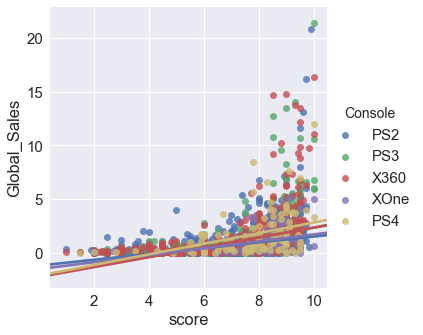

In [108]:
#Visualizing dataset information in a scatterplot broken out by platform
sns.lmplot(x='score', y='Global_Sales', hue='Console', data=merged2, ci=None)

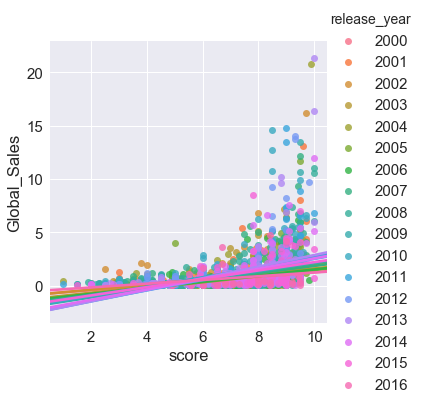

In [109]:
#Visualizing dataset information in a scatterplot broken out by platform
sns.lmplot(x='score', y='Global_Sales', hue='release_year', data=merged2, ci=None)

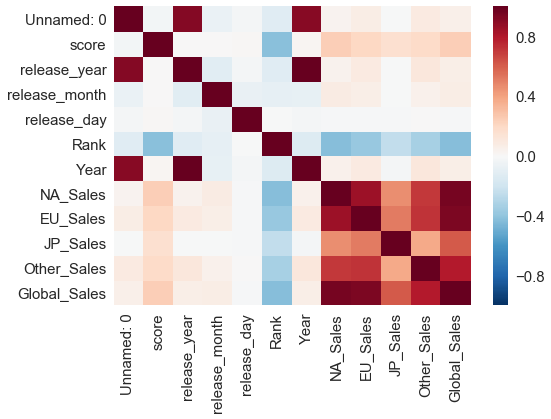

In [31]:
#examine heatmap of correlations for dataframe 
sns.heatmap(merged2.corr())

In [32]:
After2000 = merged2.loc[merged2['Global_Sales'] <= 60]

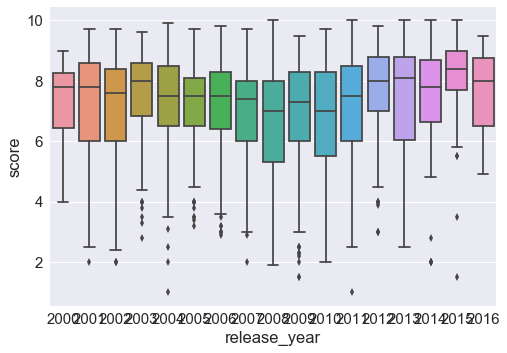

In [110]:
After2000 = merged2.loc[merged2['release_year'] >= 2000]

sns.boxplot(x="release_year", y="score", data=After2000)

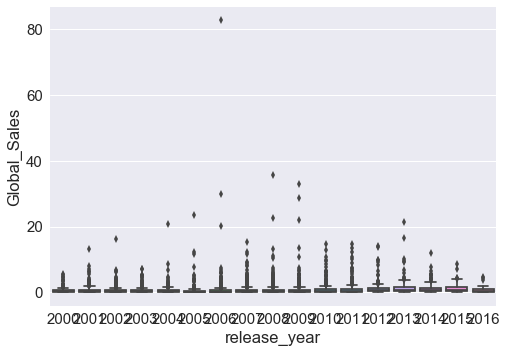

In [34]:
sns.boxplot(x="release_year", y="Global_Sales", data=After2000)

In [35]:
#score does seem to be mildly correlated with Global Sales and North American sales.
#Given the shape of the data from the scatterplot, it looks like there might
#be a greater correlation for games that are at least rated 6 or higher.

#creating a new dataframe that only includes titles with a rating equal 
#to or higher than 6
fiveplus = merged2.loc[merged2['score'] >= 5]

In [131]:
fiveplus['Console'].value_counts()

PS2     1044
X360     660
DS       600
PS3      593
XB       561
PS       499
Wii      431
GC       362
PSP      358
N64      183
PS4      102
XOne      88
3DS       86
PSV       53
Name: Console, dtype: int64

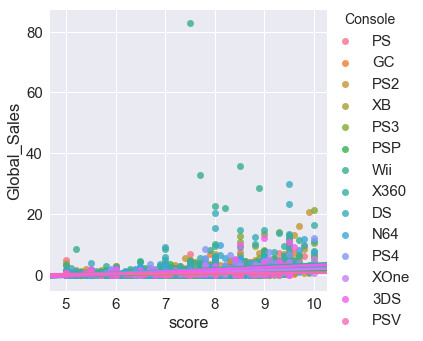

In [130]:
sns.lmplot(x='score', y='Global_Sales', hue='Console', data=fiveplus, ci=None)



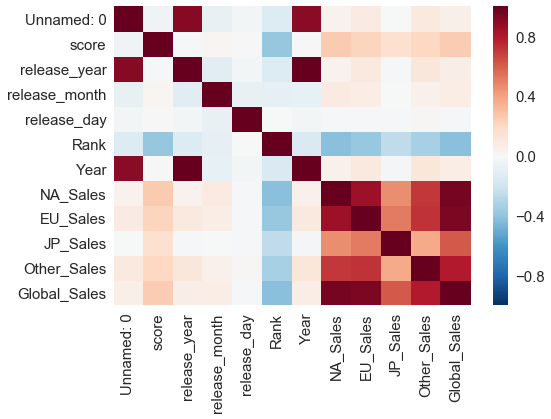

In [38]:
sns.heatmap(fiveplus.corr())

In [39]:
Genredummies = pd.get_dummies(fiveplus.Genre).iloc[:,1:]

AllFeatures = pd.concat([fiveplus, Genredummies], axis = 1)
AllFeatures.head()

,Unnamed: 0,score_phrase,title,url,Console,score,genre,editors_choice,release_year,release_month,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
15,2673,Mediocre,007 Racing,/games/007-racing/ps-14712,PS,5.0,Racing,N,2000,11,...,0,0,0,0,1,0,0,0,0,0
18,1686,Mediocre,007: Tomorrow Never Dies,/games/007-tomorrow-never-dies/ps-2310,PS,5.0,Action,N,1999,11,...,0,0,0,0,0,0,1,0,0,0
66,3840,Great,2002 FIFA World Cup,/games/2002-fifa-world-cup/gcn-477635,GC,8.2,Sports,N,2002,4,...,0,0,0,0,0,0,0,0,1,0
67,3856,Great,2002 FIFA World Cup,/games/2002-fifa-world-cup/ps2-16789,PS2,8.3,Sports,N,2002,4,...,0,0,0,0,0,0,0,0,1,0
68,3842,Great,2002 FIFA World Cup,/games/2002-fifa-world-cup/xbox-478663,XB,8.2,Sports,N,2002,4,...,0,0,0,0,0,0,0,0,1,0


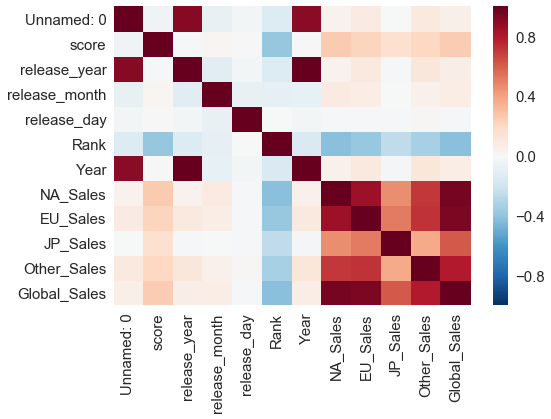

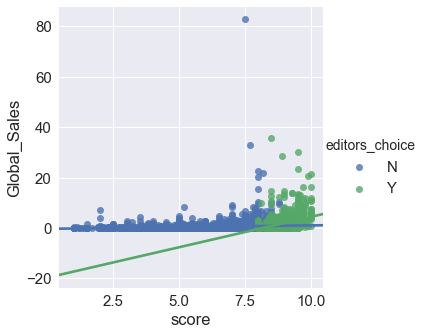

In [40]:
#Another interesting categorical feature of the data is the "Editor's Choice" aspect of game rating.
#Editors can award video games the title based on their opinion of the game's lasting appeal. 
sns.heatmap(fiveplus.corr())
sns.lmplot(x='score', y='Global_Sales', hue='editors_choice', data=merged2, ci=None)

In [41]:
feature_cols = ['score']
from sklearn.cross_validation import train_test_split
X = AllFeatures[feature_cols]
y = AllFeatures.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [42]:
# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(5620, 1)
(4215, 1)
(1405, 1)


In [43]:
# before splitting
print y.shape

# after splitting
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(5620L,)
(4215, 1)
(1405, 1)
(4215L,)
(1405L,)


In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print linreg.coef_

[ 0.44315753]


In [46]:
from sklearn import metrics
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print y_pred
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

[-0.054126    1.84564209  1.15481733 ...,  0.16175673  1.50022971
  1.32752352]


In [47]:
model.score

<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [48]:
PS2 = AllFeatures[AllFeatures.Console.str.contains("PS2") == True]

In [49]:
PS2.head()

,Unnamed: 0,score_phrase,title,url,Console,score,genre,editors_choice,release_year,release_month,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
67,3856,Great,2002 FIFA World Cup,/games/2002-fifa-world-cup/ps2-16789,PS2,8.3,Sports,N,2002,4,...,0,0,0,0,0,0,0,0,1,0
147,7437,Okay,50 Cent: Bulletproof,/games/50-cent-bulletproof/ps2-733364,PS2,6.5,Action,N,2005,11,...,0,0,0,0,0,0,0,0,0,0
215,2999,Great,ATV Offroad Fury,/games/atv-offroad-fury/ps2-15648,PS2,8.7,Racing,Y,2001,2,...,0,0,0,0,1,0,0,0,0,0
217,4337,Amazing,ATV Offroad Fury 2,/games/atv-offroad-fury-2/ps2-482066,PS2,9.0,Racing,Y,2002,11,...,0,0,0,0,1,0,0,0,0,0
218,6325,Amazing,ATV Offroad Fury 3,/games/atv-offroad-fury-3/ps2-670856,PS2,9.2,Racing,Y,2004,10,...,0,0,0,0,1,0,0,0,0,0


In [50]:
feature_cols = ['score','release_month', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
from sklearn.cross_validation import train_test_split
X = PS2[feature_cols]
y = PS2.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_

[ 0.45099581  0.03216333 -0.25697735 -0.17456726 -0.73655244 -0.1326676
 -0.34776578 -0.21503141 -0.30923184 -0.11270691 -0.83810799]


In [52]:
from sklearn import metrics
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
model = linreg.fit(X_train, y_train)

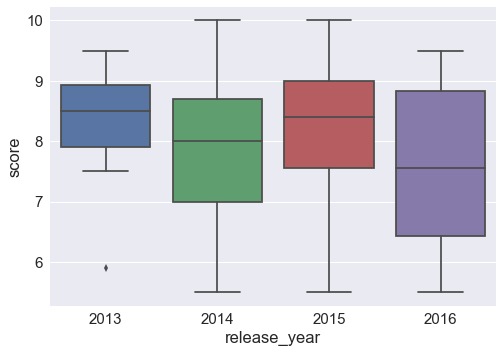

In [126]:
sns.boxplot(x="release_year", y="score", data=PS4)

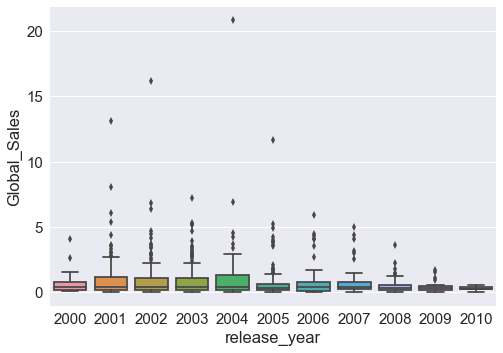

In [129]:
sns.boxplot(x="release_year", y="Global_Sales", data=PS2)

In [56]:
model.score(X_test, y_test)

0.13947578540885786

[ 0.04240977  0.69682457 -0.44163429 -0.19612567 -0.82987927 -0.1454741
  0.09361131  0.68435185 -0.29684685 -0.39693077 -0.84289385]
0.202777266993


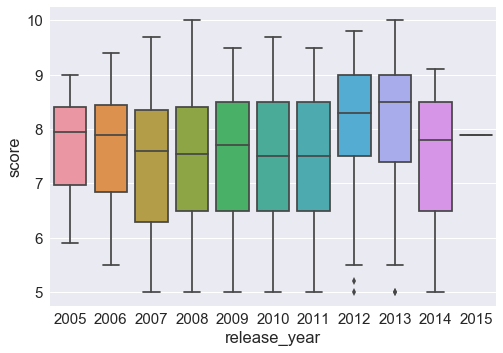

In [98]:
X360 = AllFeatures[AllFeatures.Console.str.contains("X360") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
X = X360[feature_cols]
y = X360.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_

from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=X360)

[ 0.02997745  0.67434996]
0.16966832925


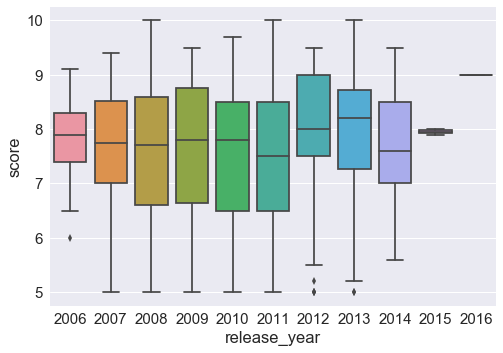

In [92]:
PS3 = AllFeatures[AllFeatures.Console.str.contains("PS3") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score']
X = PS3[feature_cols]
y = PS3.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_

from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=PS3)

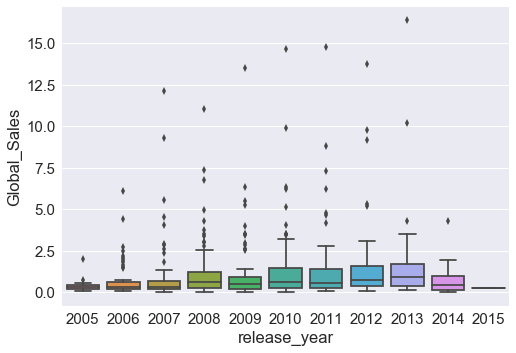

In [41]:
sns.boxplot(x="release_year", y="Global_Sales", data=X360)

[ -7.30759699e-03   6.49875910e-01   1.92229044e-01   7.44556976e-01
  -1.27502984e+00  -1.11022302e-16  -4.31454434e-01  -7.37089015e-01
   8.58345606e-01   0.00000000e+00  -2.90851782e-01   0.00000000e+00]
(76, 12)
(26, 12)
(76L,)
(26L,)
0.135530071724


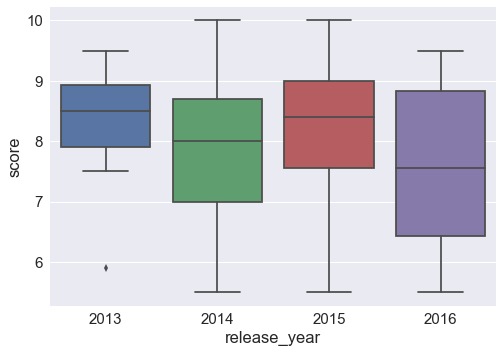

In [78]:
PS4 = AllFeatures[AllFeatures.Console.str.contains("PS4") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score', 'release_month', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
X = PS4[feature_cols]
y = PS4.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=PS4)

[-0.01114119  0.43827651]
(783, 2)
(261, 2)
(783L,)
(261L,)
0.117786918656


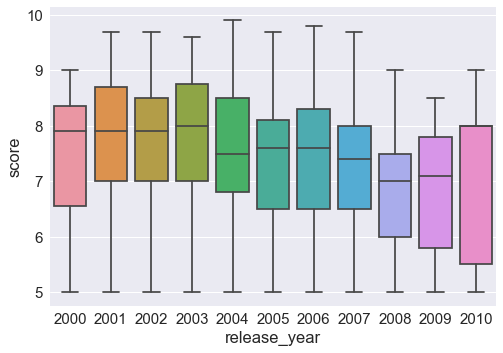

In [88]:
PS2 = AllFeatures[AllFeatures.Console.str.contains("PS2") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score']
X = PS2[feature_cols]
y = PS2.Global_Sales
#'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=PS2)

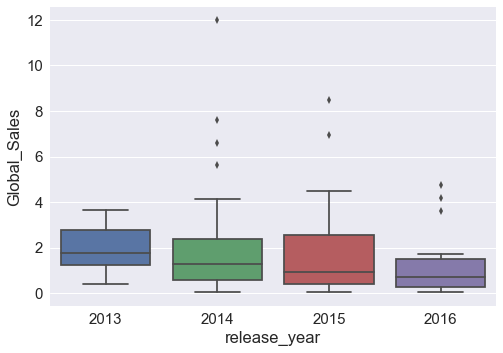

In [45]:
sns.boxplot(x="release_year", y="Global_Sales", data=PS4)

[-0.29040544  0.39387429]
(66, 2)
(22, 2)
(66L,)
(22L,)
0.167711280049


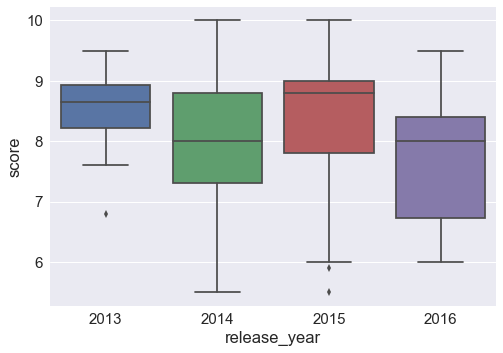

In [96]:
XOne = AllFeatures[AllFeatures.Console.str.contains("XOne") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score']
X = XOne[feature_cols]
y = XOne.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)

sns.boxplot(x="release_year", y="score", data=XOne)

In [ ]:
sns.boxplot(x="release_year", y="Global_Sales", data=XOne)

In [ ]:
sns.barplot(x="release_year", y="Global_Sales", data=XOne)

In [83]:
WiiU = AllFeatures[AllFeatures.Console.str.contains("WiiU") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score', 'release_month']
X = WiiU[feature_cols]
y = WiiU.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=Wii)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

[ 0.47262425]
-0.176464371715


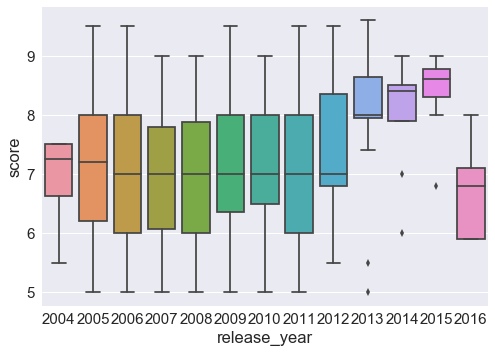

In [67]:
DS = AllFeatures[AllFeatures.Console.str.contains("DS") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['score']
X = DS[feature_cols]
y = DS.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_

from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=DS)

[-0.04901494  0.19414113]
(420, 2)
(141, 2)
(420L,)
(141L,)
0.0994391615988


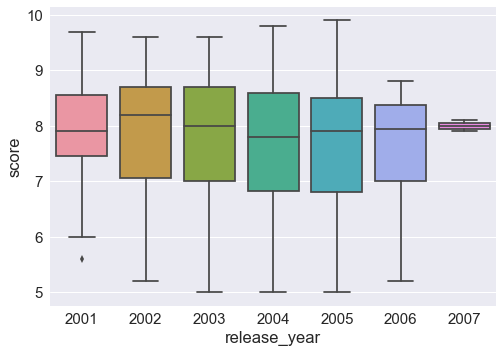

In [115]:
XB = AllFeatures[AllFeatures.Console.str.contains("XB") == True]
from sklearn.cross_validation import train_test_split
feature_cols = ['release_year','score']
X = XB[feature_cols]
y = XB.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
from sklearn import metrics
linreg.fit(X_train, y_train)

model = linreg.fit(X_train, y_train)

print model.score(X_test, y_test)
sns.boxplot(x="release_year", y="score", data=XB)